# Titanic Probability - Part A

On April 15, 1912, the largest passenger liner ever made collided with an iceberg during her maiden voyage. When the Titanic sank it killed 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. One of the reasons that the shipwreck resulted in such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others.

The titanic.csv file contains data for 887 of the real Titanic passengers. Each row represents one person. The columns describe different attributes about the person including whether they survived (S), their age (A), their passenger-class (C), their sex (G) and the fare they paid (X).

**Decision tree using Scikit-learn**

## Load libraries and Dataset

In [2]:
# Import your libraries
import pandas as pd
import random

In [3]:
#Load dataset (use variable titanic for the dataframe)
titanic = pd.read_csv('../data/titanic.csv', sep = ',')


In [4]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


### Exploring the dataset

Explore your data. Use shape and head

In [5]:
# Explore Shape
titanic.shape[0]

887

In [6]:
# Explore Head (with first five rows)


In [7]:
# explore dataset (random five rows)
l = [random.randint(0,(titanic.shape[0]-1)) for _ in range(5)]
titanic.iloc[l]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
181,0,3,Master. Clarence Gustaf Hugo Asplund,male,9.0,4,2,31.3875
338,1,2,Master. Edmond Roger Navratil,male,2.0,1,1,26.0000
651,0,3,Miss. Hanora Hegarty,female,18.0,0,0,6.7500
16,0,3,Master. Eugene Rice,male,2.0,4,1,29.1250
669,0,2,Mr. Henry Michael Mitchell,male,70.0,0,0,10.5000


In [9]:
# another random method
titanic.sample(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
71,0,2,Mr. Ambrose Jr Hood,male,21.0,0,0,73.5000
206,1,3,Mr. Nassef Cassem Albimona,male,26.0,0,0,18.7875
548,0,2,Mr. Percival James R Sharp,male,27.0,0,0,26.0000
341,0,2,Mr. Charles Frederick Waddington Sedgwick,male,25.0,0,0,13.0000
665,0,3,Mr. Jacob Cook,male,43.0,0,0,8.0500


## Pre-processing

Cleaning, transforming

In [10]:
#Remove columns we dont need (Name)
titanic.drop('Name', axis=1, inplace=True)

In [11]:
titanic.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [12]:
#Get the object types
titanic.dtypes

Survived                     int64
Pclass                       int64
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [13]:
#Chage data type if necesary,
#convert categorical variables into numerical variables
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

titanic['Sex'] = Le.fit_transform(titanic['Sex'])

In [14]:
titanic.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


## Training decision tree w/Scikit-lear

In [15]:
#Separate X and y
y = titanic['Survived']
X = titanic.drop('Survived', axis=1)

In [16]:
#Importing sklearn for train_test_split
from sklearn.model_selection import train_test_split

In [17]:
#30% fort test and 70% for train
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.30, random_state = 2001)

## Creating a model

In [18]:
# Create a Decision Tree using entropy as attribute selection
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [19]:
#Training the tree
clf = clf.fit(X_train, y_train)

## Visualization

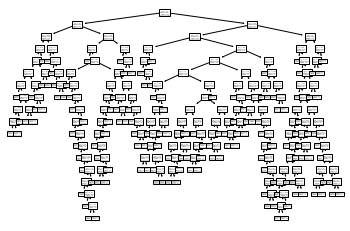

In [20]:
# Visualized the decision tree
tree.plot_tree(clf);

In [21]:
y_pred = clf.predict(X_test)

In [22]:
print('Accuracy:', sum(y_pred == y_test)/len(y_pred))

Accuracy: 0.7715355805243446
